In [3]:
# preprocessing
from sklearn import preprocessing

# iteration operations
import itertools

# nlp
import langdetect

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# word cloud
from wordcloud import WordCloud
# visualization
import matplotlib.pyplot as plt

# algebra
import numpy as np

# dataframing
import pandas as pd

In [4]:
data = pd.read_csv("./data/youtube_dataset.csv")

## 0. About data

 - Data is about **YouTube comments**. It includes video that the comment was posted on, channel of the video, date, amount of likes the video received, etc.
 - In total, there is 7 features and 19300 instances.
 - Dataset was found and downloaded from https://www.kaggle.com/nipunarora8/most-liked-comments-on-youtube


## 1. Examine data

In [5]:
data.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [6]:
data.sample(frac = 1)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
7027,CNCO - Reggaetón Lento (Bailemos),CNCOVEVO,UgyRRwvzSNKnkf46ka54AaABAg,Wilson Cañete,Vamos cncowners por los 2B y a seguir reprod...,2020-08-25T16:33:48Z,42
7170,The Chainsmokers - Don&#39;t Let Me Down (Offi...,ChainsmokersVEVO,UgzLCBHG4Au4zsiYERR4AaABAg,Subscribe to this cute dog,Quarantine basically bought us back to legenda...,2020-05-29T09:48:04Z,3862
8015,MC Fioti - Bum Bum Tam Tam (KondZilla) | Offic...,Canal KondZilla,UgwxqNsgG_eoPWwAL9V4AaABAg,Help me 50k subscribers without any video Chal...,*Dear stranger whoever reads this: may your mo...,2020-09-06T17:31:57Z,28
1697,Passenger | Let Her Go (Official Video),Passenger,UgyrJV2JR-V4MqKphtF4AaABAg,Raunak Mondal,"This songs described the anime movie ""5 cms pe...",2020-09-06T05:55:33Z,2
3177,Justin Bieber - Baby (Official Music Video) ft...,JustinBieberVEVO,UgwaDtct4_3nsZrp21Z4AaABAg,Addisonraee,Why does this have 11 million dislikes??? This...,2020-09-07T17:13:29Z,12
...,...,...,...,...,...,...,...
8844,MACKLEMORE &amp; RYAN LEWIS - THRIFT SHOP FEAT...,Macklemore LLC,UgzWdxJDUBgguWbLcDV4AaABAg,Rajvir Singh,if you were alivee back in the day u were the ...,2020-09-05T21:58:20Z,4
13190,P!nk - Just Give Me A Reason ft. Nate Ruess,PinkVEVO,Ugx428tyEm3wh60rD2d4AaABAg,Qistina Ibrahim,This song make me cry about my relationship wi...,2020-08-20T19:20:54Z,29
7256,"ROSALÍA, J Balvin - Con Altura (Official Video...",RosaliaVEVO,Ugz43pEJu16r5ne1bWB4AaABAg,Luis Ángel Pérez Buten,No puede creer que la sacaron hace un año y pi...,2020-09-06T00:32:12Z,48
13844,Ricky Martin - La Mordidita (Official Video) f...,RickyMartinVEVO,UgxBFIjnO5Q208vneL54AaABAg,usuario de google,Recuerdo que en el colegio hicieron un baile r...,2020-06-22T11:09:48Z,21


In [7]:
# most liked comments
data.sort_values("Likes",ascending=False)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
5201,Marshmello - Alone (Official Music Video),Marshmello,UgypW6-bk7J6JZJF1954AaABAg,Marshmello,"1,000,000,000 ✅",2018-10-15T19:33:03Z,540334
15805,Eminem - Rap God (Explicit) [Official Video],EminemVEVO,UgjtQw8E3CESxngCoAEC,Goldenightime,Eminem raps faster than my internet connection,2016-08-13T02:15:49Z,438973
5,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3120,Justin Bieber - Baby (Official Music Video) ft...,JustinBieberVEVO,Ugzv_LcinEv-IMMQZZN4AaABAg,Siddhant Dubey,There's 4.6M comments if you find mine then y...,2019-07-20T06:46:38Z,350917
...,...,...,...,...,...,...,...
11089,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugyndg3MQJbNCdEGZHF4AaABAg,Josthin Cobeña,ME RIO DEL MIEDO,2020-06-28T18:34:13Z,0
11090,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugz3Wy-qB08sAmy3zqV4AaABAg,Yisela Chaves,this song is beautiful,2020-06-23T22:36:37Z,0
4393,Shawn Mendes - Treat You Better,ShawnMendesVEVO,UgzScCcK6uBP92JF6yl4AaABAg,UwU,I make vid using this song and send this to my...,2020-09-08T12:21:43Z,0
11091,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,UgzZnAQdvpSS7knETiR4AaABAg,Hades Uwu,2017 el mejor año por ahora 🔥,2020-08-18T19:26:01Z,0


## 2. Preprocessing

### 1. Duplicates

In [8]:
# check for duplicates
data['Comment Id'].value_counts()[:10]

UgyqQWw05veeO5gmPO94AaABAg    2
UgxawZN6Wjl5sf8e-Qd4AaABAg    2
UgwynZ-b2duW4Q4HHF14AaABAg    2
Ugx4fE1qY_BkwYa_lM54AaABAg    2
UgyZzdtMhVE6z8XDle54AaABAg    2
UgxsdeQa3n6veK1B2FJ4AaABAg    2
Ugxz4jS1EdQ_SpRQ3Bh4AaABAg    2
UgxAIu_eI1OimbaJTnR4AaABAg    2
UgzqHnzhl0_a6KCfyrJ4AaABAg    2
UgxB4aiyqdL0DaQA1dV4AaABAg    2
Name: Comment Id, dtype: int64

In [9]:
# remove duplicates
data.drop_duplicates(['Comment Id'], keep='first', inplace=True)

In [10]:
# check result
data['Comment Id'].value_counts()[:10]

UgxHc5vSmoT7Sq0yXud4AaABAg    1
UgytRk_Kzwu8I9IzUhV4AaABAg    1
UgwT9jLNIGXuDtBs77t4AaABAg    1
Ugx2KNBVq8ZUkK6hkW54AaABAg    1
UgzGfIGwulFDTaGPhyR4AaABAg    1
UgymZ7ibMjc2Gslr1rV4AaABAg    1
UgysYa10xTEt_07TifF4AaABAg    1
Ugz9kH5J-vUgWpdMjAp4AaABAg    1
Ugxm5Px2s83cPT_4hch4AaABAg    1
UgzNuMrNYFEMGfO42Ph4AaABAg    1
Name: Comment Id, dtype: int64

### 2. Standardization

Let's create a new feature that shows the like count as **like score**. The scale in likes is quite large. 

Let's try different standardization methods:

In [11]:
# 1. Z-score standardization: x - µ / sigma
y = data[['Likes']]
like_score_z_score = preprocessing.StandardScaler().fit_transform(y)

In [12]:
# Examine results
print(like_score_z_score)
print(max(like_score_z_score), min(like_score_z_score))

[[ 8.13349356]
 [-0.1156597 ]
 [29.94361958]
 ...
 [-0.18063298]
 [-0.18071758]
 [-0.18080218]]
[45.53153875] [-0.18105598]


In [13]:
# 2. Logarithmic standardization, apply logarithm for every value.
y_not_zero = data['Likes'].apply(lambda x: x + 1e-10)  # so that x > 0 for all x.

In [14]:
like_score_log = np.log(y_not_zero)

In [15]:
print(like_score_log)
print(max(like_score_log), min(like_score_log))

0        11.495576
1         6.650279
2        12.782914
3         2.564949
4         4.804021
           ...    
19295     8.534444
19296     1.791759
19297     1.609438
19298     1.386294
19299     1.098612
Name: Likes, Length: 19121, dtype: float64
13.199942745855235 -23.025850929940457


In [16]:
# 3. Min-max-scaling, scales values between 0 and 1.
like_score_minmax = preprocessing.MinMaxScaler().fit_transform(y)

In [17]:
print(like_score_minmax)
print(max(like_score_minmax), min(like_score_minmax))

[[1.81887499e-01]
 [1.43059663e-03]
 [6.59001655e-01]
 ...
 [9.25353578e-06]
 [7.40282862e-06]
 [5.55212147e-06]]
[1.] [0.]


Let's use these three "like scores" as ground truths and examine on the way how does the standardization affect our results.

### 3. Language detection

A problem: The comments are written in multiple different languages. Later, when extracting patterns from comments, multiple languages might bring problems. For example Japanese and Korean languages don't write spaces. Detecting words is hence challenging with the same logic than with for example English. 

So, let's try to detect the language of the comments with tools available, and examine the results.

Let's try library called **langdetect**, which has a support for 55 languages. It is not perfect, and especially short/single word sentences causes trouble for it. We don't have ground truths for languages, but let's take a random sample of 100 and examine manually how the library succeeds.

In [18]:
comments = data.sample(n=100, random_state=1)['Comment'].values
for c in comments:
    print(c)
    try:
        print(langdetect.detect(c))
    except:
        pass

Mi novia me dejo por que decía que me gusta mucho el reggaetón 
Pero volverá, para seducirme otra vez, besarme otra vez volverme a poner el mundo al revés. 🤷🏿‍♂️
es
Yes Mari and Keone!!!!!!!!!
en
jajaja ches mancos yo desde chiquita yo sabía que la morena era la Taylor
es
I've counted too many stars, now I'm an astronomer.
en
Found out I’m twice this guy’s age but I still can’t help but wanna play it
en
WALKERS TOGETHER AND FOREVER 😎😎😎TAKE ME THROUGH THE NIGHT FALL INTO THE DARKSIDE WE DON'T NEED THE LIGHT WERE LIVE ON THE DARK SIDE
en
Do you recall, not long ago
We would walk on the sidewalk
Innocent, remember?
All we did was care for each other

But the night was warm
We were bold and young
All around the wind blows
We would only hold on to let go

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

What will we do w

We can see that from this sample that
1. Most of the comments are in English.
2. Further, most of the languages are correctly detected (I spotted three mistakes).

Dominance of English in this sample means that we cannot examine well enough how does the detection work for other languages (except maybe Spanish and Portugease). To play it safer, let's use only the comments which are detected as English.

In [19]:
def detect_lang(comment: str):
    """
    Embed try / except syntax for detecting languages.
    """
    
    try:
        return langdetect.detect(comment)
    except:
        return comment

# apply detection for each comment
lang = data['Comment'].apply(detect_lang)
data['Language'] = lang

In [20]:
print(lang)
print("Number of English comments:", len(lang[lang=='en']))
print("% of total number of comments: ", (len(lang[lang=='en']) / len(data)) * 100)

0        en
1        en
2        en
3        en
4        en
         ..
19295    en
19296    en
19297    en
19298    en
19299    es
Name: Comment, Length: 19121, dtype: object
Number of English comments: 13202
% of total number of comments:  69.04450604047906


Let's extract the English comments.

In [21]:
data_en = data[data['Language'] == 'en'].copy()
data_en.head(20)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Language
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,en
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,en
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,en
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,en
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,en
6,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzPg7VsuRTwJf77jch4AaABAg,lucas tehe12,claim your “here before 7 billion” tickets her...,2020-09-08T06:01:36Z,763,en
7,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,en
8,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzhueoG3QOV4AbAYAt4AaABAg,Guty Castro soda,Song: spanish\nComments: English\nHotel: trivago,2020-09-09T01:17:50Z,150,en
10,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,en
11,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugy-CwNxTeLKUuYOXdF4AaABAg,Pls HeLP Me reach 100 SUBscribers,Just imagine how many people's come here every...,2020-09-09T05:43:47Z,142,en


## 3. NLP

Let's test NLP methods on the data.

In [22]:
comments = data_en['Comment']

In [23]:
# cut comments into sentences
sentences = [sent_tokenize(c) for c in comments]

In [24]:
words = [word_tokenize(c) for c in comments]  # cut comments into words
words[0:3]

[['The',
  'people',
  'who',
  'liked',
  'this',
  'comment',
  'is',
  'officially',
  'before',
  '7B',
  'views'],
 ['-', 'Wait', ',', 'it', "'s", '7B', 'views', '-', 'Always', 'has', 'been'],
 ['*',
  'Teacher',
  ':',
  'What',
  'is',
  'the',
  'population',
  'of',
  'the',
  'Earth',
  '?',
  '*',
  '*',
  'Me',
  ':',
  'Around',
  'one',
  'Despacito',
  '*']]

### 1. Frequent words

In [25]:
words_all = [w.lower() for w in list(itertools.chain.from_iterable(words)) ] # set words to lowercase and combine all words together into one list.
fdist = FreqDist(words_all)  # count frequencies
fdist.most_common(10)  # list 10 most common words and counts

[(',', 13271),
 ('i', 12347),
 ('the', 9954),
 ('you', 9106),
 ('this', 8002),
 (':', 7401),
 ('.', 7368),
 ('to', 6651),
 ('and', 5627),
 ('a', 5147)]

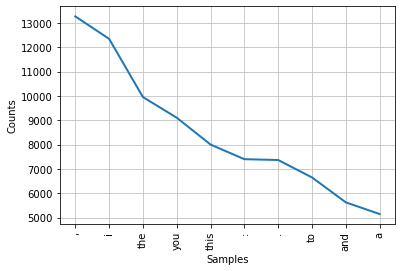

In [26]:
fdist.plot(10)

### 2. Remove punctuation marks

For knowledge discovery, punctuation marks are not very useful. Let's remove them from data.

In [27]:
words_no_punc = [w for w in words_all if w.isalpha()]

In [28]:
print(len(words_all), len(words_no_punc))

395855 319859


Punctuation marks removed.

In [29]:
fdist = FreqDist(words_no_punc)
fdist.most_common(10)

[('i', 12347),
 ('the', 9954),
 ('you', 9106),
 ('this', 8002),
 ('to', 6651),
 ('and', 5627),
 ('a', 5147),
 ('is', 4313),
 ('in', 4298),
 ('it', 4218)]

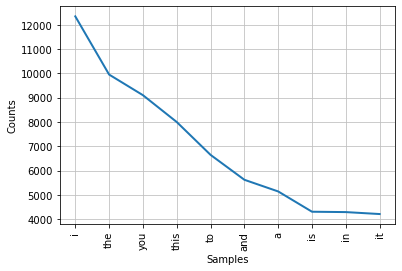

In [30]:
fdist.plot(10)

### 3. Remove stopwords

Words such as 'and', 'but' and 'so' are also not very informative in relation to the content of the comments. Hence, let's remove them as well.

In [31]:
sw = stopwords.words("english")  # english language stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
words_no_stopwords = [w for w in words_no_punc if w not in sw]  # exlude stopwords
print(len(words_no_punc), len(words_no_stopwords))

319859 164937


### 4. Final frequency distribution

In [33]:
fdist = FreqDist(words_no_stopwords)
fdist.most_common(10)

[('song', 3753),
 ('like', 2517),
 ('love', 1717),
 ('people', 1630),
 ('know', 1568),
 ('oh', 1562),
 ('years', 1406),
 ('rip', 1316),
 ('one', 1283),
 ('still', 1100)]

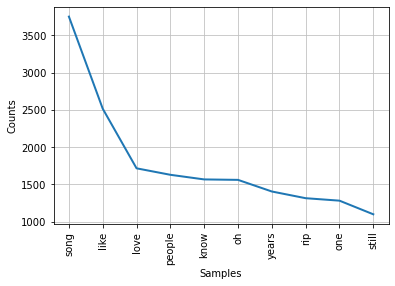

In [34]:
fdist.plot(10)

### 5. WordCloud

Let's generate a WordCloud to visualize the frequent words.

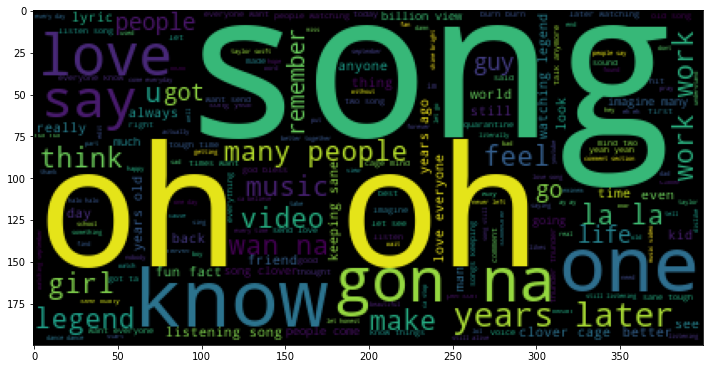

In [35]:
wc = WordCloud().generate(" ".join(words_no_stopwords))
plt.figure(figsize = (12, 12))
plt.imshow(wc)

## Bag of Words

Let's turn our data of comments into a matrix of word counts. In the end, we have a matrix where on 0-axis there is the comments, and on 1-axis the words.

This process is called the Bag of Words representation. 

Let's use **CountVectorizer** to convert the comments into a matrix of token (word) counts.

In [36]:
# specify data and target
X = data_en['Comment']
y = data_en['Likes']
print(X.shape)
print(y.shape)

(13202,)
(13202,)


In [43]:
# split X and y into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9901,)
(3301,)
(9901,)
(3301,)


In [38]:
# import and create an instance of CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [44]:
# learn the "vocabulary" of the train data
vectorizer.fit(X_train)

CountVectorizer()

In [45]:
# words that the vectorizer has "learned" from the comments
feature_names = vectorizer.get_feature_names()

**Note: How does this differ from tokenizing to words, that we did earlier?**

 - Everything is lowercase
 - Words less than two letters have not been included (notice there is no 'a')
 - Punctuation has been removed
 - There are no duplicates

In [47]:
# transform data into a document-term matrix (aka comment-word matrix)
X_train_dtm = vectorizer.transform(X_train)

# convert the matrix into a dataframe
pd.DataFrame(X_train_dtm.toarray(), columns=vectorizer.get_feature_names())

,00,000,000001,001,00s,01,010s,016,02,020s,...,주무세요,한국인,ｐｅｒｆｅｃｔ,𝑑𝑖𝑒𝑠,𝓝𝓸𝓼𝓽𝓪𝓵𝓰𝓲𝓪,𝗙𝗔𝗡,𝗹𝗲𝗴𝗲𝗻𝗱,𝗿𝗲,𝘆𝗼𝘂,𝚂ᴜʙ𝚂
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# using the fitted vocabulary, transform testing data into document-term matrix
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm

<3301x10723 sparse matrix of type '<class 'numpy.int64'>'
	with 52867 stored elements in Compressed Sparse Row format>

Let's define a Decison Tree Regressor-model and fit it to our data.

In [51]:
# import and create an instance of DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(random_state=1)

In [54]:
# fit the model to data
dtr_model.fit(X_train_dtm, y_train)

DecisionTreeRegressor(random_state=1)

In [55]:
# predict likes based on comment
predicted_likes = dtr_model.predict(X_test_dtm)

Let's check how did we do by calculating mean absolute error between our **predicted likes** and **actual** likes for the test data.

In [66]:
# import and calculcate mean absolute error between predicted and actual likes
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, predicted_likes))
print(y_test.describe()) # statistics

4065.4295661740584
count      3301.000000
mean       2371.375341
std       11978.130167
min           0.000000
25%           2.000000
50%          30.000000
75%         331.000000
max      350917.000000
Name: Likes, dtype: float64


Now, we see that our mean absolute error for predictions is around 4000 likes. However, this does not actually tell much about how good our predictions are, since there is a lot of variance in the data. As we notice from the statistics, the like values vary on the interval [0, 438973]. 

Since the interval of likes is long, let's try applying standardization to the values.

## Standardization

Let's create a new feature that shows the like count as **like score**. The scale in likes is quite large. 

Let's try different standardization methods:

In [75]:
# 1. Z-score standardization: x - µ / sigma
y = data_en[['Likes']]
like_score_z_score = preprocessing.StandardScaler().fit_transform(y)

In [76]:
# Examine results
print(like_score_z_score)
print(max(like_score_z_score), min(like_score_z_score))

[[ 7.96599812]
 [-0.13960008]
 [29.39657564]
 ...
 [-0.20335954]
 [-0.20344267]
 [-0.2035258 ]]
[36.28725268] [-0.20385831]


In [77]:
# 2. Logarithmic standardization, apply logarithm for every value.
y_not_zero = data_en['Likes'].apply(lambda x: x + 1e-10)  # so that x > 0 for all x.

In [78]:
like_score_log = np.log(y_not_zero)

In [79]:
print(like_score_log)
print(max(like_score_log), min(like_score_log))

0        1.149558e+01
1        6.650279e+00
2        1.278291e+01
3        2.564949e+00
4        4.804021e+00
             ...     
19294    1.000000e-10
19295    8.534444e+00
19296    1.791759e+00
19297    1.609438e+00
19298    1.386294e+00
Name: Likes, Length: 13202, dtype: float64
12.99219318674904 -23.025850929940457


In [80]:
# 3. Min-max-scaling, scales values between 0 and 1.
like_score_minmax = preprocessing.MinMaxScaler().fit_transform(y)

In [81]:
print(like_score_minmax)
print(max(like_score_minmax), min(like_score_minmax))

[[2.23886207e-01]
 [1.76092835e-03]
 [8.11168341e-01]
 ...
 [1.36682666e-05]
 [1.13902222e-05]
 [9.11217774e-06]]
[1.] [0.]


Let's fit the DecisionTreeRegressor-model again, but using three different standardized targets.

In [82]:
# z-score
X_train, X_test, y_train, y_test = train_test_split(X, like_score_z_score, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9901,)
(3301,)
(9901, 1)
(3301, 1)


In [83]:
# learn the "vocabulary" of the train data
vectorizer.fit(X_train)

CountVectorizer()

In [84]:
# transform data into a document-term matrix (aka comment-word matrix)
X_train_dtm = vectorizer.transform(X_train)

DecisionTreeRegressor(random_state=1)

In [85]:
# using the fitted vocabulary, transform testing data into document-term matrix
X_test_dtm = vectorizer.transform(X_test)

In [86]:
# predict likes based on comment
predicted_likes = dtr_model.predict(X_test_dtm)

In [89]:
print(mean_absolute_error(y_test, predicted_likes))

0.31940158311692435


Quite low, right?